In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt # Para gráficos
from sklearn.linear_model import LogisticRegression

d = pd.read_csv('/content/drive/MyDrive/LaboDatos2021/anticoncepcion_indonesia.csv')

In [ ]:
print(d.columns)
print(d['edad_mujer'].size)

Index(['edad_mujer', 'educacion_mujer', 'educacion_hombre', 'numero_hijos',
       'religion_mujer', 'mujer_trabaja', 'ocupacion_hombre', 'nivel_vida',
       'exposicion_medios', 'metodo_anticonceptivo'],
      dtype='object')
296


In [ ]:
# Binarizo la columna 'metodo_anticonceptivo' en 0 (si no usa algún método anticonceptivo) y 1 (si usa algún método anticonceptivo) 
d_anticon = d.copy()
for i in d_anticon.index:
  if d_anticon.loc[i, 'metodo_anticonceptivo'] == 1:
    d_anticon.loc[i, 'metodo_anticonceptivo'] = 0
  else: 
    d_anticon.loc[i, 'metodo_anticonceptivo'] = 1

In [ ]:
d_anticon['metodo_anticonceptivo'].value_counts()

1    165
0    131
Name: metodo_anticonceptivo, dtype: int64

In [ ]:
from sklearn.preprocessing import MinMaxScaler

campos = ['edad_mujer', 'educacion_mujer', 'educacion_hombre', 'numero_hijos',
       'religion_mujer', 'mujer_trabaja', 'ocupacion_hombre', 'nivel_vida',
       'exposicion_medios'] # Lista que contiene las features de interés

X = d_anticon[campos].values 
scaler = MinMaxScaler() # primero creo un objeto MinMaxScaler. Por defecto, esto normaliza los datos al intervalo [0,1]
scaler.fit(X) # encuentro los parametros para el escaleo
X = scaler.transform(X) # aplico la transformacion

y = d_anticon['metodo_anticonceptivo'] 

regLog = LogisticRegression(penalty = 'none', class_weight='balanced', max_iter=10000) # Inicializamos nuevamente el modelo
regLog.fit(X, y) # Ajustamos el modelo con los parámetros
score = regLog.score(X,y) # Calculamos el score

print('El score del modelo es de: {}'.format(round(score,4)))


El score del modelo es de: 0.6926


In [ ]:
from sklearn.metrics import confusion_matrix

ypred = regLog.predict(X) # con esto obtengo la predicción de las etiquetas en base a mis datos


In [ ]:
cm = confusion_matrix(ypred, y, normalize='true') # primera entrada son las etiquetas predichas, segunda son las reales

print(cm)

[[0.64705882 0.35294118]
 [0.26875    0.73125   ]]


In [ ]:
cm = confusion_matrix(ypred, y) 

def balanced_accuracy(cm):
  sensibilidad = cm[1,1]/(cm[1,1]+cm[0,1])
  especificidad = cm[0,0]/(cm[1,0]+cm[0,0])
  return [sensibilidad, especificidad, (sensibilidad + especificidad)/2]

metricas = balanced_accuracy(cm)

print('Matriz de confusion del modelo es:')
print(cm)
print('Sensibilidad del modelo es de: {}'.format(round(metricas[0],4)))  
print('Especificidad del modelo es de: {}'.format(round(metricas[1],4)))  
print('BA del modelo es de: {}'.format(round(metricas[2],4))) 

Matriz de confusion del modelo es:
[[ 88  48]
 [ 43 117]]
Sensibilidad del modelo es de: 0.7091
Especificidad del modelo es de: 0.6718
BA del modelo es de: 0.6904


## Train - test split

In [ ]:
from sklearn.model_selection import train_test_split

X_temp = X
for i in np.arange(2,5):
    X_temp = np.concatenate((X_temp,X**i), axis=1)
X_1 = X_temp
 

X_train, X_test, y_train, y_test = train_test_split(X_1, y, test_size=0.2)

scaler = MinMaxScaler() # primero creo un objeto MinMaxScaler. Por defecto, esto normaliza los datos al intervalo [0,1]
scaler.fit(X_train) # encuentro los parametros para el escaleo
X_train = scaler.transform(X_train) # aplico la transformacion

scaler = MinMaxScaler() # primero creo un objeto MinMaxScaler. Por defecto, esto normaliza los datos al intervalo [0,1]
scaler.fit(X_test) # encuentro los parametros para el escaleo
X_test = scaler.transform(X_test) # aplico la transformacion

#### IMPORTANTE: HAGO LA NORMALIZACION DE LOS DATOS POR SEPARADO EN LOS SETS DE TRAIN Y TEST

regLog = LogisticRegression(penalty = 'none', class_weight='balanced', max_iter=10000) # Inicializamos nuevamente el modelo
regLog.fit(X_train, y_train) # Ajustamos el modelo con los parámetros

score_train = regLog.score(X_train,y_train) # Calculamos el score
ypred_train = regLog.predict(X_train) # con esto obtengo la predicción de las etiquetas en base a mis datos
cm_train = confusion_matrix(ypred_train, y_train) # primera entrada son las etiquetas predichas, segunda son las reales
metricas_train = balanced_accuracy(cm_train)

print('Para TRAIN set:')
print('El score del modelo es de: {}'.format(round(score_train,4))) # Le pido que printee el score del modelo. Le pido que lo haga con 4 cifras significativas
print('Matriz de confusion del modelo es:')
print(cm_train)
print('Sensibilidad del modelo es de: {}'.format(round(metricas_train[0],4)))  
print('Especificidad del modelo es de: {}'.format(round(metricas_train[1],4)))  
print('BA del modelo es de: {}'.format(round(metricas_train[2],4))) 
print('\n')

score_test= regLog.score(X_test,y_test) # Calculamos el score
ypred_test= regLog.predict(X_test) # con esto obtengo la predicción de las etiquetas en base a mis datos
cm_test = confusion_matrix(ypred_test, y_test) # primera entrada son las etiquetas predichas, segunda son las reales
metricas_test = balanced_accuracy(cm_test)


print('Para TEST set:')
print('El score del modelo es de: {}'.format(round(score_test,4))) # Le pido que printee el score del modelo. Le pido que lo haga con 4 cifras significativas
print('Matriz de confusion del modelo es:')
print(cm_test)
print('Sensibilidad del modelo es de: {}'.format(round(metricas_test[0],4)))  
print('Especificidad del modelo es de: {}'.format(round(metricas_test[1],4)))  
print('BA del modelo es de: {}'.format(round(metricas_test[2],4))) 


NameError: ignored

In [ ]:
def classifier(X,y,n,c):  # X es la matriz de features, y los labels, n-1 la potencia máxima en la que aparecerán los features, C es la constante de regularización

  X_temp = X
  for i in np.arange(2,n):
    X_temp = np.concatenate((X_temp,X**i), axis=1)
  X = X_temp
 
  
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

  scaler = MinMaxScaler() # primero creo un objeto MinMaxScaler. Por defecto, esto normaliza los datos al intervalo [0,1]
  scaler.fit(X_train) # encuentro los parametros para el escaleo
  X_train = scaler.transform(X_train) # aplico la transformacion

  scaler = MinMaxScaler() # primero creo un objeto MinMaxScaler. Por defecto, esto normaliza los datos al intervalo [0,1]
  scaler.fit(X_test) # encuentro los parametros para el escaleo
  X_test = scaler.transform(X_test) # aplico la transformacion

  regLog = LogisticRegression(penalty = 'l2', class_weight='balanced', C=c, max_iter=10000) 
  regLog.fit(X_train, y_train) 
  
  ypred_train = regLog.predict(X_train) # con esto obtengo la predicción de las etiquetas en base a mis datos
  cm_train = confusion_matrix(ypred_train, y_train) # primera entrada son las etiquetas predichas, segunda son las reales
  metricas_train = balanced_accuracy(cm_train)

  ypred_test = regLog.predict(X_test) # con esto obtengo la predicción de las etiquetas en base a mis datos
  cm_test= confusion_matrix(ypred_test, y_test) # primera entrada son las etiquetas predichas, segunda son las reales
  metricas_test = balanced_accuracy(cm_test)

  return metricas_train[2], metricas_test[2]

In [ ]:
n_values = np.arange(1,6) # rango de potencias maximas 
c_values = np.arange(3,10,0.5) # rango de constantes de regularizacion

iterations = 100 # esto se puede poner en 100 para que no tarde mil años durante la clase

mean_BA_train = np.zeros((len(n_values),len(c_values))) #  los arrays con los balanced accuracy para cada combinacion de hiperparametros, para train y test
mean_BA_test = np.zeros((len(n_values),len(c_values)))

for xx,n in enumerate(n_values): # itero sobre n
    print(n)
    for yy,c in enumerate(c_values): # itero sobre c
      BA_test_temp = [] # variables temporales para ir poniendo los resultados a lo largo de las iteraciones
      BA_train_temp = []
      #print([n,c]) # esto es para los ansiosos
      for it in np.arange(iterations): # itero
          BA_train, BA_test = classifier(X,y,n,c)  # calculo las balanced accuracy para esos hiperparametros
          BA_test_temp.append(BA_test) # agrego a las variables temporales
          BA_train_temp.append(BA_train)
      mean_BA_train[xx,yy] = np.mean(BA_train_temp) # calculo promedios
      mean_BA_test[xx,yy] = np.mean(BA_test_temp)




1
2
3
4
5


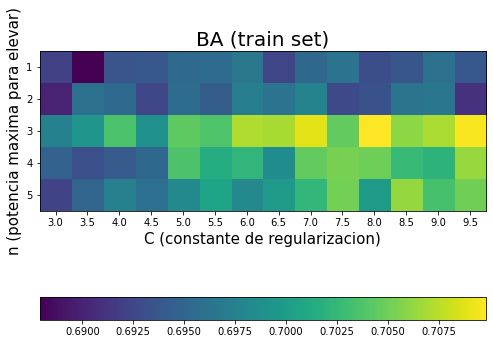

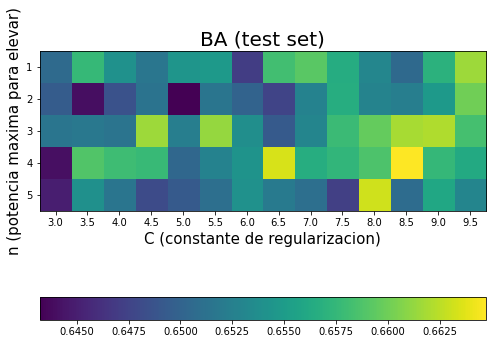

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(8,8))  # visualizacion train set
img = ax.imshow(mean_BA_train) # graficamos la matriz
y_label_list = n_values # estos son los ticks de los ejes
x_label_list = c_values
ax.set_xticks(np.arange(len(c_values))) # creo los ticks de los ejes
ax.set_yticks(np.arange(len(n_values)))
ax.set_yticklabels(y_label_list) # pongo los ticks de los ejes
ax.set_xticklabels(x_label_list)
plt.xlabel('C (constante de regularizacion)', fontsize=15) # le pongo nombre a ejes y titulo 
plt.ylabel('n (potencia maxima para elevar)', fontsize=15)
plt.title('BA (train set)', fontsize=20)
fig.colorbar(img, orientation="horizontal", pad=0.2) # la barra de colores donde no me moleste

fig, ax = plt.subplots(1,1, figsize=(8,8)) # visualizacion test set, ver comentarios para el caso train, es idéntico
img = ax.imshow(mean_BA_test)
y_label_list = n_values
x_label_list = c_values
ax.set_xticks(np.arange(len(c_values)))
ax.set_yticks(np.arange(len(n_values)))
ax.set_yticklabels(y_label_list)
ax.set_xticklabels(x_label_list)
plt.xlabel('C (constante de regularizacion)', fontsize=15)
plt.ylabel('n (potencia maxima para elevar)', fontsize=15)
plt.title('BA (test set)', fontsize=20)
fig.colorbar(img, orientation="horizontal", pad=0.2)


Tanto para train como test, se maximiza la performance para n = 3 y C = 5 aprox.

In [ ]:
classifier(X,y,3,5)

(0.6935897435897436, 0.6453252032520325)

In [ ]:
classifier(X,y,3,9)

(0.7089743589743589, 0.6902947154471545)

##Testeo

In [ ]:
path = '/content/drive/My Drive/LaboDatos2021/anticoncepcion_indonesia_test.csv'
df_test = pd.read_csv(path)
df_test.columns

Index(['edad_mujer', 'educacion_mujer', 'educacion_hombre', 'numero_hijos',
       'religion_mujer', 'mujer_trabaja', 'ocupacion_hombre', 'nivel_vida',
       'exposicion_medios'],
      dtype='object')

In [ ]:
n = 3
c = 5

X_train = X
for i in np.arange(2,n):
  X_train = np.concatenate((X_train,X**i), axis=1)

 
scaler = MinMaxScaler() # primero creo un objeto MinMaxScaler. Por defecto, esto normaliza los datos al intervalo [0,1]
scaler.fit(X_train) # encuentro los parametros para el escaleo
X_train = scaler.transform(X_train) # aplico la transformacion

clf = LogisticRegression(penalty = 'l2', class_weight='balanced', C=c, max_iter=10000) 
clf.fit(X_train, y) 

ypred_train = regLog.predict(X_train) # con esto obtengo la predicción de las etiquetas en base a mis datos
cm_train= confusion_matrix(ypred_train, y) # primera entrada son las etiquetas predichas, segunda son las reales
metricas_train = balanced_accuracy(cm_train)

print('Sensibilidad del modelo es de: {}'.format(round(metricas_train[0],4)))  
print('Especificidad del modelo es de: {}'.format(round(metricas_train[1],4)))  
print('BA del modelo es de: {}'.format(round(metricas_train[2],4))) 

Sensibilidad del modelo es de: 0.7333
Especificidad del modelo es de: 0.6794
BA del modelo es de: 0.7064


In [ ]:
campos = ['edad_mujer', 'educacion_mujer', 'educacion_hombre', 'numero_hijos','religion_mujer', 'mujer_trabaja', 'ocupacion_hombre', 'nivel_vida', 'exposicion_medios']
X_test = np.array(df_test[campos])

X_test_ext = X_test  #features de testeo extendidas
for i in np.arange(2,n):
  X_test_ext = np.concatenate((X_test_ext, X_test**i), axis=1)

scaler = MinMaxScaler() # primero creo un objeto MinMaxScaler. Por defecto, esto normaliza los datos al intervalo [0,1]
scaler.fit(X_test_ext) # encuentro los parametros para el escaleo
X_test_ext = scaler.transform(X_test_ext) # aplico la transformacion

In [ ]:
probas = regLog.predict_proba(X_test_ext)
print(probas)

[[0.85120041 0.14879959]
 [0.80639857 0.19360143]
 [0.74554123 0.25445877]
 ...
 [0.95571664 0.04428336]
 [0.9462438  0.0537562 ]
 [0.79883746 0.20116254]]


In [ ]:
probas.shape

(1177, 2)

In [ ]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y, probas[:y.size,1])

print(auc)

0.4881101087207957


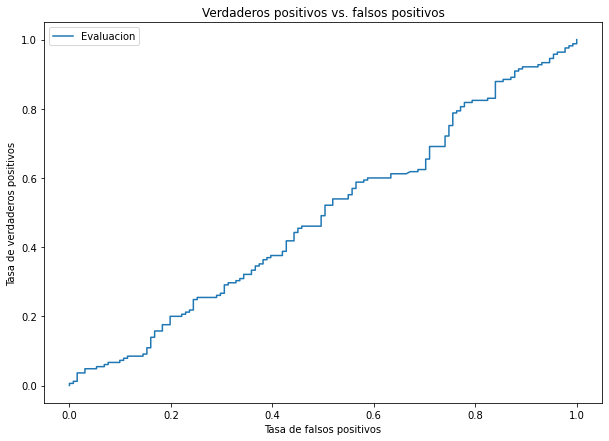

In [ ]:
from sklearn.metrics import roc_curve

fpr_test, tpr_test, thresholds_test = roc_curve(y, probas[:y.size,1]) 

fig, ax = plt.subplots(figsize = (10,7))
ax.set_title('Verdaderos positivos vs. falsos positivos')
ax.plot(fpr_test,tpr_test, label = "Evaluacion") # graficamos la curva ROC para el set de evaluacion

ax.set_xlabel('Tasa de falsos positivos') # Etiqueta del eje x
ax.set_ylabel('Tasa de verdaderos positivos') # Etiqueta del eje y

plt.legend()

In [ ]:
save_path= '/content/drive/My Drive/LaboDatos2021/Agustin_deOtazua.csv' # acá uds. van a tener que poner un directorio suyo en drive, porque no tienen permisos de escribir en el directorio LaboDatos2021

np.savetxt(save_path, probas, delimiter=",")